In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('cars.csv')

In [3]:
df=pd.DataFrame(data)
df.head(-3)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Fuel Information.City mpg,Identification.Make
0,140,143,202,18,Audi
1,140,143,202,22,Audi
2,140,143,202,21,Audi
3,140,143,202,21,Audi
4,140,143,202,21,Audi
...,...,...,...,...,...
391,137,190,62,21,Volkswagen
392,137,190,62,18,Volkswagen
393,137,190,62,17,Volkswagen
394,179,52,237,16,Audi


In [51]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Fuel Information.City mpg
count,399.000000,399.000000,399.000000,399.000000
mean,143.378446,136.889724,144.872180,19.243108
std,67.221674,74.788935,76.026749,4.899343
min,1.000000,7.000000,3.000000,8.000000
25%,92.000000,66.000000,62.000000,17.000000
50%,172.000000,155.000000,160.000000,20.000000
75%,193.000000,202.000000,222.000000,22.000000
max,247.000000,243.000000,248.000000,38.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Dimensions.Height          399 non-null    int64 
 1   Dimensions.Length          399 non-null    int64 
 2   Dimensions.Width           399 non-null    int64 
 3   Fuel Information.City mpg  399 non-null    int64 
 4   Identification.Make        399 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [54]:
df.isnull().sum()

Dimensions.Height            0
Dimensions.Length            0
Dimensions.Width             0
Fuel Information.City mpg    0
Identification.Make          0
dtype: int64

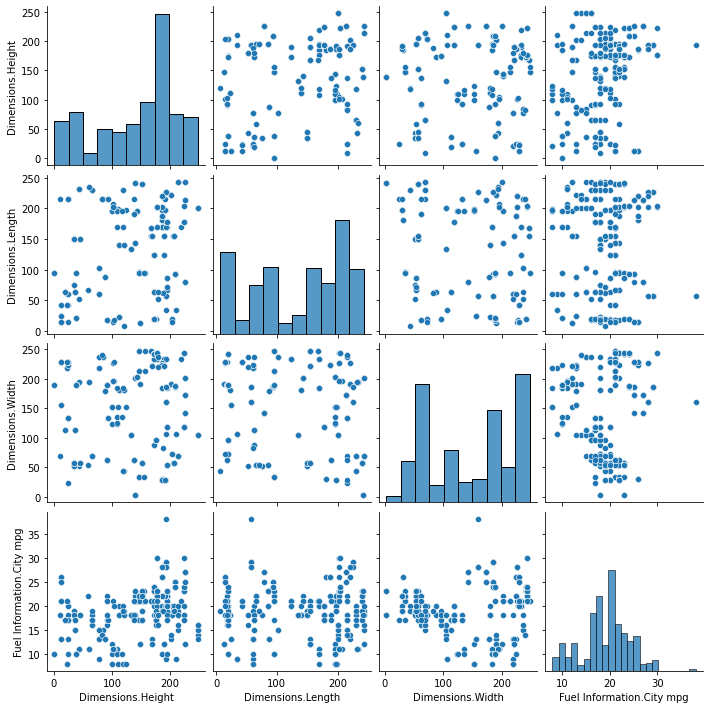

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
x=df.iloc[:,:4]
x.head(10)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Fuel Information.City mpg
0,140,143,202,18
1,140,143,202,22
2,140,143,202,21
3,140,143,202,21
4,140,143,202,21
5,91,17,62,16
6,91,17,62,17
7,201,221,191,13
8,201,221,191,14
9,147,96,34,22


In [7]:
y=df['Identification.Make']
y.head(-3)

0            Audi
1            Audi
2            Audi
3            Audi
4            Audi
          ...    
391    Volkswagen
392    Volkswagen
393    Volkswagen
394          Audi
395          Audi
Name: Identification.Make, Length: 396, dtype: object

In [8]:
print(f'Features :',x.shape)
print('*********')
print(f'Labels :',y.shape)

Features : (399, 4)
*********
Labels : (399,)


# Naive Bayes Gaussian

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.33)
from sklearn.naive_bayes import GaussianNB

In [10]:
gaussian=GaussianNB()

In [11]:
gaussian.fit(xtrain,ytrain)

GaussianNB()

In [12]:
# gaussian.predict([])

In [13]:
xtest.head(-6)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Fuel Information.City mpg
45,167,168,247,21
31,22,60,219,8
227,247,200,105,15
194,208,93,186,25
339,224,177,118,18
...,...,...,...,...
276,102,202,196,11
289,172,19,242,23
91,247,200,105,15
364,13,14,229,26


In [14]:
ytest

45          Volvo
31      Chevrolet
227         Volvo
194          Ford
339        Toyota
          ...    
68          Volvo
182        Toyota
220        Toyota
281    Volkswagen
325        Toyota
Name: Identification.Make, Length: 132, dtype: object

In [15]:
# pr=[119,230,44,19]
# p=gaussian.predict([pr])
# print(p)

In [16]:
print("Naive Bayes score: ",gaussian.score(xtest,ytest))

Naive Bayes score:  0.49242424242424243


# Decision Tree

criterion=gini

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model=DecisionTreeClassifier(criterion='gini',max_depth=40,random_state=0)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=40, random_state=0)

In [19]:
y_model_pred=model.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score
print('model accuracy score with criterion gini Index : {0:0.4f}'.format(accuracy_score(ytest,y_model_pred)))

model accuracy score with criterion gini Index : 0.9545


In [21]:
#compare the train set and test set accuracy

In [22]:
y_pred_train_model=model.predict(xtrain)
y_pred_train_model

array(['Toyota', 'Ford', 'Audi', 'Volvo', 'Volkswagen', 'Honda', 'Ford',
       'Nissan', 'Volkswagen', 'Volkswagen', 'Audi', 'Toyota', 'Nissan',
       'Volvo', 'Volvo', 'Toyota', 'Bentley', 'Audi', 'BMW', 'Toyota',
       'Volkswagen', 'Honda', 'Honda', 'Volvo', 'Toyota', 'Toyota',
       'Audi', 'Toyota', 'Nissan', 'Volvo', 'Nissan', 'Audi', 'Nissan',
       'Chevrolet', 'Ford', 'Volvo', 'Volvo', 'Chevrolet', 'Toyota',
       'Nissan', 'Toyota', 'Volvo', 'Chevrolet', 'Rolls-Royce', 'Maybach',
       'Toyota', 'Honda', 'Bentley', 'Maybach', 'Toyota', 'Ford',
       'Toyota', 'Audi', 'Volvo', 'Toyota', 'Nissan', 'Volkswagen',
       'Ford', 'Honda', 'Chevrolet', 'Toyota', 'Nissan', 'Ford',
       'Bentley', 'Ford', 'Audi', 'Rolls-Royce', 'Ford', 'Volvo', 'Volvo',
       'Bentley', 'Volkswagen', 'Honda', 'Nissan', 'Ford', 'Ford',
       'Toyota', 'Bentley', 'Ford', 'Nissan', 'Nissan', 'Chevrolet',
       'Volkswagen', 'Nissan', 'Toyota', 'Volvo', 'Honda', 'Volvo',
       'Volvo', 'Ford

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, y_pred_train_model)))

Training-set accuracy score: 1.0000


In [24]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 1.0000
Test set score: 0.9545


In [25]:
import matplotlib.pyplot as plt

[Text(0.6674510542168675, 0.9583333333333334, 'X[2] <= 241.0\ngini = 0.89\nsamples = 267\nvalue = [2, 27, 3, 15, 22, 23, 23, 8, 26, 6, 52, 26, 34]'),
 Text(0.46893825301204817, 0.875, 'X[3] <= 23.5\ngini = 0.88\nsamples = 237\nvalue = [2, 24, 3, 15, 22, 23, 23, 8, 26, 6, 52, 3, 30]'),
 Text(0.2164909638554217, 0.7916666666666666, 'X[3] <= 11.5\ngini = 0.873\nsamples = 197\nvalue = [2, 24, 3, 15, 17, 0, 23, 8, 25, 6, 41, 3, 30]'),
 Text(0.04819277108433735, 0.7083333333333334, 'X[2] <= 186.5\ngini = 0.661\nsamples = 29\nvalue = [0, 0, 0, 14, 3, 0, 0, 8, 0, 4, 0, 0, 0]'),
 Text(0.024096385542168676, 0.625, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.07228915662650602, 0.625, 'X[2] <= 191.5\ngini = 0.604\nsamples = 15\nvalue = [0, 0, 0, 0, 3, 0, 0, 8, 0, 4, 0, 0, 0]'),
 Text(0.04819277108433735, 0.5416666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0]'),
 Text(0.0963855421686747, 0.5416666666666666, 'X[3] <= 1

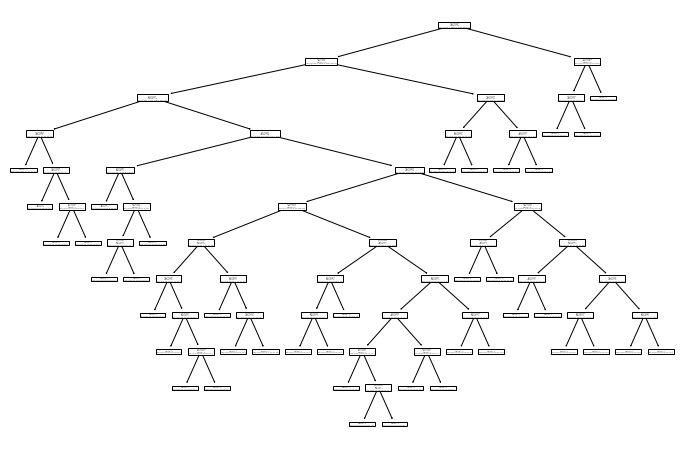

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(xtrain, ytrain)) 

In [27]:
pr=[143,196,203,21]
p=model.predict([pr])
print(p)

['Audi']


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


decision tree CLASSIFIER with entropy

In [28]:
model2=DecisionTreeClassifier (criterion='entropy', max_depth=30, random_state=0)

In [29]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)

In [30]:
y_pred_en = model2.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(ytest, y_pred_en)))

Model accuracy score with criterion entropy: 0.9394


In [32]:
y_pred_train_en = model2.predict(xtrain)

y_pred_train_en

array(['Toyota', 'Ford', 'Audi', 'Volvo', 'Volkswagen', 'Honda', 'Ford',
       'Nissan', 'Volkswagen', 'Volkswagen', 'Audi', 'Toyota', 'Nissan',
       'Volvo', 'Volvo', 'Toyota', 'Bentley', 'Audi', 'BMW', 'Toyota',
       'Volkswagen', 'Honda', 'Honda', 'Volvo', 'Toyota', 'Toyota',
       'Audi', 'Toyota', 'Nissan', 'Volvo', 'Nissan', 'Audi', 'Nissan',
       'Chevrolet', 'Ford', 'Volvo', 'Volvo', 'Chevrolet', 'Toyota',
       'Nissan', 'Toyota', 'Volvo', 'Chevrolet', 'Rolls-Royce', 'Maybach',
       'Toyota', 'Honda', 'Bentley', 'Maybach', 'Toyota', 'Ford',
       'Toyota', 'Audi', 'Volvo', 'Toyota', 'Nissan', 'Volkswagen',
       'Ford', 'Honda', 'Chevrolet', 'Toyota', 'Nissan', 'Ford',
       'Bentley', 'Ford', 'Audi', 'Rolls-Royce', 'Ford', 'Volvo', 'Volvo',
       'Bentley', 'Volkswagen', 'Honda', 'Nissan', 'Ford', 'Ford',
       'Toyota', 'Bentley', 'Ford', 'Nissan', 'Nissan', 'Chevrolet',
       'Volkswagen', 'Nissan', 'Toyota', 'Volvo', 'Honda', 'Volvo',
       'Volvo', 'Ford

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [34]:
print('Training set score: {:.4f}'.format(model2.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model2.score(xtest, ytest)))

Training set score: 1.0000
Test set score: 0.9394


[Text(0.31505102040816324, 0.95, 'X[3] <= 13.5\nentropy = 3.367\nsamples = 267\nvalue = [2, 27, 3, 15, 22, 23, 23, 8, 26, 6, 52, 26, 34]'),
 Text(0.10204081632653061, 0.85, 'X[0] <= 93.5\nentropy = 2.487\nsamples = 43\nvalue = [0, 0, 3, 15, 6, 0, 0, 8, 4, 6, 1, 0, 0]'),
 Text(0.061224489795918366, 0.75, 'X[2] <= 206.5\nentropy = 1.747\nsamples = 19\nvalue = [0, 0, 0, 0, 6, 0, 0, 8, 0, 4, 1, 0, 0]'),
 Text(0.04081632653061224, 0.65, 'X[3] <= 10.5\nentropy = 1.239\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 4, 1, 0, 0]'),
 Text(0.02040816326530612, 0.55, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0]'),
 Text(0.061224489795918366, 0.55, 'X[0] <= 65.5\nentropy = 0.722\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0]'),
 Text(0.04081632653061224, 0.45, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]'),
 Text(0.08163265306122448, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]')

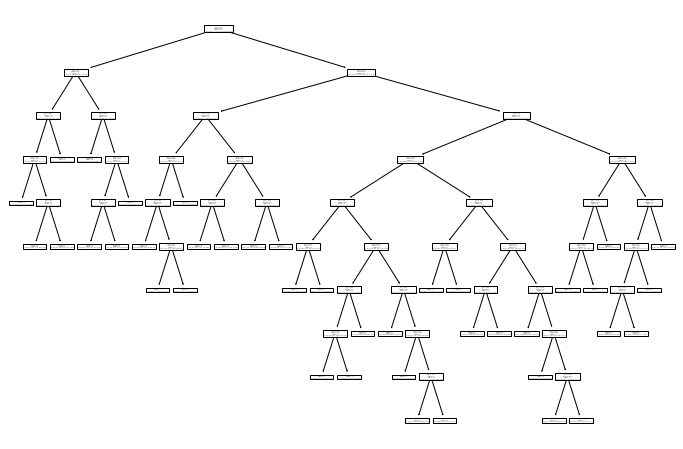

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model2.fit(xtrain, ytrain)) 

In [36]:
pr=[143,196,203,21]
p=model2.predict([pr])
print(p)

['Audi']


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_en))

              precision    recall  f1-score   support

        Audi       1.00      0.70      0.82        10
         BMW       0.50      1.00      0.67         1
     Bentley       0.67      1.00      0.80         2
   Chevrolet       1.00      1.00      1.00         9
        Ford       0.80      1.00      0.89         8
       Honda       1.00      0.93      0.96        14
     Maybach       1.00      1.00      1.00         5
      Nissan       0.67      1.00      0.80         8
 Rolls-Royce       1.00      1.00      1.00         4
      Toyota       1.00      0.91      0.95        34
  Volkswagen       1.00      1.00      1.00        14
       Volvo       1.00      0.96      0.98        23

    accuracy                           0.94       132
   macro avg       0.89      0.96      0.91       132
weighted avg       0.96      0.94      0.94       132





# Random Forrest

# Random forest classifier model with default parameters


In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision trees :{0:0.4f}'.format(accuracy_score(ytest,y_pred)))

Model accuracy score with 10 decision trees :0.9621


# Random forest classifier model with parameter n_estimators=100

In [39]:
model2=RandomForestClassifier(n_estimators=100,random_state=0)

In [40]:
model2.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [41]:
y_pred_100=model2.predict(xtest)
print('Model accuracy score with 100 decision trees :{0:0.4f}'.format(accuracy_score(ytest,y_pred_100)))

Model accuracy score with 100 decision trees :0.9621


# finding most important features with Random forest model


In [42]:
clf=RandomForestClassifier(n_estimators=100,random_state=0)

In [43]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [44]:
#feature importance variable -> feature importance score

In [45]:
feature_scores=pd.Series(clf.feature_importances_,index=xtrain.columns).sort_values(ascending=False)
feature_scores

Dimensions.Width             0.339995
Dimensions.Height            0.273415
Fuel Information.City mpg    0.212791
Dimensions.Length            0.173799
dtype: float64

In [46]:
#dimension width is the most important one

# visualize feature scores of the features

Text(0, 0.5, 'Features')

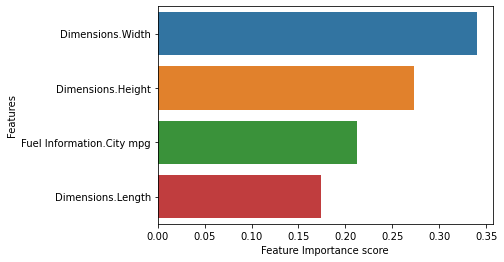

In [47]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance score')
plt.ylabel('Features')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

        Audi       1.00      1.00      1.00        10
         BMW       1.00      1.00      1.00         1
     Bentley       1.00      1.00      1.00         2
   Chevrolet       1.00      1.00      1.00         9
        Ford       1.00      1.00      1.00         8
       Honda       1.00      0.93      0.96        14
     Maybach       1.00      1.00      1.00         5
      Nissan       0.62      1.00      0.76         8
 Rolls-Royce       1.00      1.00      1.00         4
      Toyota       1.00      0.91      0.95        34
  Volkswagen       1.00      1.00      1.00        14
       Volvo       1.00      0.96      0.98        23

    accuracy                           0.96       132
   macro avg       0.97      0.98      0.97       132
weighted avg       0.98      0.96      0.97       132



In [49]:
pr=[143,196,203,21]
p=clf.predict([pr])
print(p)

['Audi']


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
